In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_id = '1nCbwq2PktId7IlJmlR5kGn7vvpgiE8vW'
file_url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(file_url)

In [ ]:
data=data.drop('ID',axis=1)

In [ ]:
data.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
# Assuming 'data' is the DataFrame that contains both  lead_1_data and lead_0_data

# Fill missing values in 'Credit_Product' column with 'Yes' where Lead is 1
data.loc[data['Is_Lead']==1,'Credit_Product']=data.loc[data['Is_Lead'] == 1, 'Credit_Product'].fillna('Yes')

# Fill missing values in 'Credit_Product' column with 'No' where Lead is 0
data.loc[data['Is_Lead']==0,'Credit_Product']=data.loc[data['Is_Lead'] == 0, 'Credit_Product'].fillna('No')


In [ ]:
data.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [ ]:
data['Region_Code'] = data['Region_Code'].str.replace('RG', '').astype(int)

In [ ]:
data['Channel_Code'] = data['Channel_Code'].str.replace('X', '').astype(int)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns to encode
categorical_columns = ['Gender', 'Occupation', 'Is_Active', 'Credit_Product']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the encoder on the selected categorical columns
encoded_columns = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame from the encoded_columns array with column names
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from 'data'
data.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the original 'data' DataFrame with the encoded_data DataFrame
data = pd.concat([data, encoded_data], axis=1)


In [ ]:
#transformation technique
#log transformation:

# Log transformation on the "avg_account_balance" column
data["Avg_Account_Balance"] = data["Avg_Account_Balance"].map(lambda i: np.log(i) if i > 0 else 0)


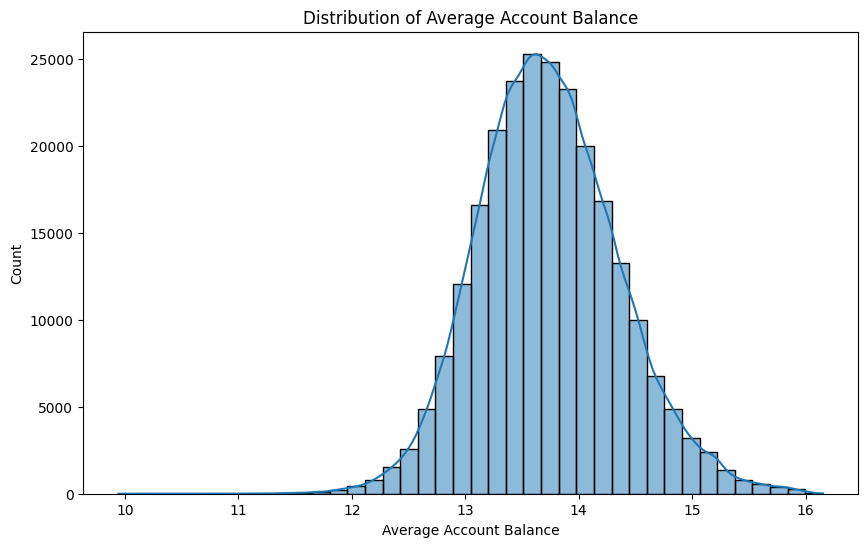

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()     #normal distribution now post handling

In [ ]:
data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,13.860193,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,13.274205,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,14.210464,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,13.061453,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,13.695360,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,14.470741,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,13.668114,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,13.416016,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,12.917806,0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Assuming 'data' is your DataFrame, and 'Age' is the column representing ages
 # Define the bin edges and corresponding labels
age_bins = [0, 30, 50, float('inf')]  # Customize the age bins as per your preference
age_labels = ['Young', 'Middle-aged', 'Senior']

# Create the 'Age_Group' column based on the age bins
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)


In [ ]:
data.drop(columns=['Age'], inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns to encode
categorical_columns = [ 'Age_Group']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the selected categorical columns
encoded_columns = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame from the encoded_columns array with column names
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from 'data'
data.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the original 'data' DataFrame with the encoded_data DataFrame
data = pd.concat([data, encoded_data], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data

,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Age_Group_Senior,Age_Group_Young
0,268,3,43,13.860193,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,277,1,32,13.274205,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,268,3,26,14.210464,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,270,1,19,13.061453,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,282,1,33,13.695360,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,284,3,109,14.470741,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
245721,268,1,15,13.668114,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
245722,281,1,13,13.416016,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
245723,273,1,31,12.917806,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.dtypes

Region_Code                   int64
Channel_Code                  int64
Vintage                       int64
Avg_Account_Balance         float64
Is_Lead                       int64
Gender_Male                 float64
Occupation_Other            float64
Occupation_Salaried         float64
Occupation_Self_Employed    float64
Is_Active_Yes               float64
Credit_Product_Yes          float64
Age_Group_Senior            float64
Age_Group_Young             float64
dtype: object

In [ ]:
data['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [ ]:
data['Is_Lead'].value_counts(normalize=True)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

**Train test split**

In [ ]:
x=data.drop('Is_Lead',axis=1)

In [ ]:
y=data['Is_Lead']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (196580, 12)
Number transactions y_train dataset:  (196580,)
Number transactions X_test dataset:  (49145, 12)
Number transactions y_test dataset:  (49145,)


**Choose Proper Evaluation Metric**

In [ ]:
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.762274900803744
Precision =  0.497571189279732
Recall =  0.5110537634408602
F1 Score =  0.5042223636749417


In [ ]:
#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf_clf.predict(x_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.811801810967545
Precision =  0.6188713227936762
Recall =  0.5320430107526881
F1 Score =  0.5721818770525926


In [ ]:
#Naive Bayes

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.811801810967545
Precision =  0.6188713227936762
Recall =  0.5320430107526881
F1 Score =  0.5721818770525926


In [ ]:
#Gradient Boosting Machines (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting classifier
gbm_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
gbm_clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = gbm_clf.predict(x_test)



In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.8327805473598535
Precision =  0.6653722939520434
Recall =  0.5895913978494624
F1 Score =  0.6251938338046155


In [ ]:
#on the basis of  f1 score , precision scoreemetrics gradient boosting machine is the best model1

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 46663
Before OverSampling, counts of label '0': 149917 



In [ ]:
print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (299834, 12)
After OverSampling, the shape of train_y: (299834,) 

After OverSampling, counts of label '1': 149917
After OverSampling, counts of label '0': 149917


In [ ]:
#DECISION TREE

In [ ]:
dt_clf_smote = DecisionTreeClassifier()
dt_clf_smote.fit(x_train_res, y_train_res)

DecisionTreeClassifier()

In [ ]:
y_pred=dt_clf_smote.predict(x_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.7503713500864788
Precision =  0.4771969643237109
Recall =  0.5787526881720431
F1 Score =  0.5230912766288291


In [ ]:
#RANDOM FOREST

In [ ]:
rf_clf_smote = RandomForestClassifier()
rf_clf_smote.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
y_pred=rf_clf_smote.predict(x_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.798616339403805
Precision =  0.5677009873060649
Recall =  0.6232258064516129
F1 Score =  0.5941690244802559


In [ ]:
##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_res, y_train_res)

GaussianNB()

In [ ]:
y_pred = nb_classifier.predict(x_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.7254247634550819
Precision =  0.4546160944101792
Recall =  0.805247311827957
F1 Score =  0.5811398063074248


In [ ]:
##Gradient Boosting Machines (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(x_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gbm_classifier.predict(x_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.8036015871400957
Precision =  0.5613456874572477
Recall =  0.7765161290322581
F1 Score =  0.6516278062513535


In [ ]:
# on the basis of SMOTE ,GBM IS THE BEST MODEL

**NEAR MISS**

In [ ]:
#DECISION TREE

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

x_train_miss, y_train_miss = nr.fit_resample(x_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 46663
Before Undersampling, counts of label '0': 149917 

After Undersampling, the shape of train_X: (93326, 12)
After Undersampling, the shape of train_y: (93326,) 

After Undersampling, counts of label '1': 46663
After Undersampling, counts of label '0': 46663


In [ ]:
dt_clf_miss = DecisionTreeClassifier()
dt_clf_miss.fit(x_train_miss, y_train_miss)

DecisionTreeClassifier()

In [ ]:
y_pred=dt_clf_miss.predict(x_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.5513480516837929
Precision =  0.30605789982883086
Recall =  0.7075268817204301
F1 Score =  0.42728382555391053


In [ ]:
confusion_matrix(y_test,y_pred)

array([[18871, 18649],
       [ 3400,  8225]])

In [ ]:
#RANDOM FOREST

In [ ]:
rf_clf_miss = RandomForestClassifier()
rf_clf_miss.fit(x_train_miss, y_train_miss)
y_pred=rf_clf_miss.predict(x_test)

In [ ]:
y_pred=dt_clf_miss.predict(x_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.5513480516837929
Precision =  0.30605789982883086
Recall =  0.7075268817204301
F1 Score =  0.42728382555391053


In [ ]:
confusion_matrix(y_test,y_pred)

array([[18871, 18649],
       [ 3400,  8225]])

In [ ]:
##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier_miss = GaussianNB()
nb_classifier_miss.fit(x_train_miss, y_train_miss)

GaussianNB()

In [ ]:
y_pred = nb_classifier_miss.predict(x_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.6185369823990233
Precision =  0.364187643020595
Recall =  0.8214193548387096
F1 Score =  0.5046373365041616


In [ ]:
confusion_matrix(y_test,y_pred)

array([[20849, 16671],
       [ 2076,  9549]])

In [ ]:
##Gradient Boosting Machines (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_classifier_miss = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier_miss.fit(x_train_miss, y_train_miss)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gbm_classifier_miss.predict(x_test)

In [ ]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.6767321192389867
Precision =  0.4088926891834117
Recall =  0.8227096774193549
F1 Score =  0.5462801656432958


In [ ]:
confusion_matrix(y_test,y_pred)

array([[23694, 13826],
       [ 2061,  9564]])

In [1]:
#GBM IS THE BEST MODEL UNDER NEAR MISS

# **Random** **Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split



# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling to the dataset
x_resampled, y_resampled = oversampler.fit_resample(x_train, y_train)

# Show the new class distribution
print(y_resampled.value_counts())

# Now you can proceed to split the data into train and test sets, and train your model on the resampled data.
# Assuming you have your feature data in 'x' and target labels in 'y'

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

0    149917
1    149917
Name: Is_Lead, dtype: int64


In [ ]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



In [ ]:
# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_resampled, y_resampled)
dt_predictions = dt_model.predict(x_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)


Decision Tree Accuracy: 0.7612575033065418
Decision Tree Precision: 0.49532791140335697
Decision Tree F1-score: 0.4938963895958245
Decision Tree Recall: 0.4924731182795699


In [ ]:
#Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_resampled, y_resampled)
rf_predictions = rf_model.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)


Random Forest Accuracy: 0.7998372164004477
Random Forest Precision: 0.5732186732186733
Random Forest F1-score: 0.5872876022655759
Random Forest Recall: 0.6020645161290322


In [ ]:
# Gradient Boosting Machines

In [ ]:
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(x_resampled, y_resampled)
gbm_predictions = gbm_model.predict(x_test)

gbm_accuracy = accuracy_score(y_test, gbm_predictions)
gbm_precision = precision_score(y_test, gbm_predictions)
gbm_f1 = f1_score(y_test, gbm_predictions)
gbm_recall = recall_score(y_test, gbm_predictions)

print("Gradient Boosting Accuracy:", gbm_accuracy)
print("Gradient Boosting Precision:", gbm_precision)
print("Gradient Boosting F1-score:", gbm_f1)
print("Gradient Boosting Recall:", gbm_recall)


Gradient Boosting Accuracy: 0.7984942517041408
Gradient Boosting Precision: 0.5517801299013712
Gradient Boosting F1-score: 0.6494885498885075
Gradient Boosting Recall: 0.789247311827957


In [ ]:
# Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_resampled, y_resampled)
nb_predictions = nb_model.predict(x_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)


Naive Bayes Accuracy: 0.6998270424254757
Naive Bayes Precision: 0.4294481295970398
Naive Bayes F1-score: 0.5633694429645415
Naive Bayes Recall: 0.8186666666666667


**On the basis of Random Oversampling ,GBM is the best model**(NOT CONSIDERING )

## **Balanced Bagging Classifier**

In [ ]:
# Decision Tree

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load or prepare your data (x and y)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the base estimator (Decision Tree)
base_estimator_dt = DecisionTreeClassifier(random_state=42)

# Initialize the BalancedBaggingClassifier
bb_classifier_dt = BalancedBaggingClassifier(base_estimator=base_estimator_dt, random_state=42)

# Fit the BalancedBaggingClassifier to the training data
bb_classifier_dt.fit(x_train, y_train)

# Make predictions on the test data
bb_predictions_dt = bb_classifier_dt.predict(x_test)

# Calculate metrics
bb_accuracy_dt = accuracy_score(y_test, bb_predictions_dt)
bb_precision_dt = precision_score(y_test, bb_predictions_dt)
bb_f1_dt = f1_score(y_test, bb_predictions_dt)
bb_recall_dt = recall_score(y_test, bb_predictions_dt)

# Print metrics
print("Balanced Bagging Classifier with Decision Tree:")
print("Accuracy:", bb_accuracy_dt)
print("Precision:", bb_precision_dt)
print("F1-score:", bb_f1_dt)
print("Recall:", bb_recall_dt)


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Balanced Bagging Classifier with Decision Tree:
Accuracy: 0.8001017397497202
Precision: 0.5643628046601387
F1-score: 0.6164896939412867
Recall: 0.6792258064516129


In [ ]:
# Gradient Boosting

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Load or prepare your data (X and y)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the base estimator (Gradient Boosting)
base_estimator_gbm = GradientBoostingClassifier(random_state=42)

# Initialize the BalancedBaggingClassifier
bb_classifier_gbm = BalancedBaggingClassifier(base_estimator=base_estimator_gbm, random_state=42)

# Fit the BalancedBaggingClassifier to the training data
bb_classifier_gbm.fit(x_train, y_train)

# Make predictions on the test data
bb_predictions_gbm = bb_classifier_gbm.predict(x_test)

# Calculate metrics
bb_accuracy_gbm = accuracy_score(y_test, bb_predictions_gbm)
bb_precision_gbm = precision_score(y_test, bb_predictions_gbm)
bb_f1_gbm = f1_score(y_test, bb_predictions_gbm)
bb_recall_gbm = recall_score(y_test, bb_predictions_gbm)

# Print metrics
print("Balanced Bagging Classifier with Gradient Boosting:")
print("Accuracy:", bb_accuracy_gbm)
print("Precision:", bb_precision_gbm)
print("F1-score:", bb_f1_gbm)
print("Recall:", bb_recall_gbm)


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Balanced Bagging Classifier with Gradient Boosting:
Accuracy: 0.7972326788076102
Precision: 0.5495581561977549
F1-score: 0.6487858175025553
Recall: 0.791741935483871


In [ ]:
#Naive Bayes

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Load or prepare your data (X and y)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the base estimator (Naive Bayes)
base_estimator_nb = GaussianNB()

# Initialize the BalancedBaggingClassifier
bb_classifier_nb = BalancedBaggingClassifier(base_estimator=base_estimator_nb, random_state=42)

# Fit the BalancedBaggingClassifier to the training data
bb_classifier_nb.fit(x_train, y_train)

# Make predictions on the test data
bb_predictions_nb = bb_classifier_nb.predict(x_test)

# Calculate metrics
bb_accuracy_nb = accuracy_score(y_test, bb_predictions_nb)
bb_precision_nb = precision_score(y_test, bb_predictions_nb)
bb_f1_nb = f1_score(y_test, bb_predictions_nb)
bb_recall_nb = recall_score(y_test, bb_predictions_nb)

# Print metrics
print("Balanced Bagging Classifier with Naive Bayes:")
print("Accuracy:", bb_accuracy_nb)
print("Precision:", bb_precision_nb)
print("F1-score:", bb_f1_nb)
print("Recall:", bb_recall_nb)


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Balanced Bagging Classifier with Naive Bayes:
Accuracy: 0.6994200834265948
Precision: 0.4290289116413333
F1-score: 0.5629068528819979
Recall: 0.818236559139785


In [ ]:
#Random Forest

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load or prepare your data (X and y)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the base estimator (RandomForestClassifier)
base_estimator_rf = RandomForestClassifier(random_state=42)

# Initialize the BalancedBaggingClassifier
bb_classifier_rf = BalancedBaggingClassifier(base_estimator=base_estimator_rf, random_state=42)

# Fit the BalancedBaggingClassifier to the training data
bb_classifier_rf.fit(x_train, y_train)

# Make predictions on the test data
bb_predictions_rf = bb_classifier_rf.predict(x_test)

# Calculate metrics
bb_accuracy_rf = accuracy_score(y_test, bb_predictions_rf)
bb_precision_rf = precision_score(y_test, bb_predictions_rf)
bb_f1_rf = f1_score(y_test, bb_predictions_rf)
bb_recall_rf = recall_score(y_test, bb_predictions_rf)

# Print metrics
print("Balanced Bagging Classifier with Random Forest:")
print("Accuracy:", bb_accuracy_rf)
print("Precision:", bb_precision_rf)
print("F1-score:", bb_f1_rf)
print("Recall:", bb_recall_rf)


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Balanced Bagging Classifier with Random Forest:
Accuracy: 0.8005086987486011
Precision: 0.5573904821935077
F1-score: 0.6433612222626409
Recall: 0.7606881720430108


In [ ]:
#on the basis of Balanced Bagging Classifier , Gradient Boost is the best model

**cross validation of bagging classifier and smote methods**

In [ ]:
#BAGGING CLASSIFIER

In [ ]:
#DECISION TREE

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# Assuming you have your features 'x' and target 'y'

# Initialize the base estimator (Decision Tree)
base_estimator_dt = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold for stratified cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a BalancedBaggingClassifier with the base Decision Tree classifier
bb_classifier_dt = BalancedBaggingClassifier(base_estimator=base_estimator_dt, random_state=42)

# Define the scoring metrics (precision and F1-score) for cross-validation
scoring = {
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Perform stratified cross-validation using cross_validate
cv_results = cross_validate(bb_classifier_dt, x, y, cv=stratified_kfold, scoring=scoring)

# Extract precision and F1 scores from the results
precision_scores = cv_results['test_precision']
f1_scores = cv_results['test_f1']

# Print cross-validation precision scores
print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Precision:", precision_scores.mean())
print("Standard Deviation (Precision):", precision_scores.std())

# Print cross-validation F1 scores
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", f1_scores.mean())
print("Standard Deviation (F1):", f1_scores.std())


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Cross-Validation Precision Scores: [0.56062848 0.56068713 0.56353791 0.56304902 0.56283413]
Mean Precision: 0.5621473334080225
Standard Deviation (Precision): 0.0012375408060134735
Cross-Validation F1 Scores: [0.61562863 0.61590812 0.61196487 0.61674556 0.61478569]
Mean F1 Score: 0.615006574291556
Standard Deviation (F1): 0.001644660235736636


In [ ]:
#RANDOM FOREST

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# Assuming you have your features 'x' and target 'y'

# Initialize the base estimator (Random Forest)
base_estimator_rf = RandomForestClassifier(random_state=42)

# Initialize StratifiedKFold for stratified cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a BalancedBaggingClassifier with the base Random Forest classifier
bb_classifier_rf = BalancedBaggingClassifier(base_estimator=base_estimator_rf, random_state=42)

# Define the scoring metrics (precision and F1-score) for cross-validation
scoring = {
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Perform stratified cross-validation using cross_validate
cv_results = cross_validate(bb_classifier_rf, x, y, cv=stratified_kfold, scoring=scoring)

# Extract precision and F1 scores from the results
precision_scores = cv_results['test_precision']
f1_scores = cv_results['test_f1']

# Print cross-validation precision scores
print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Precision:", precision_scores.mean())
print("Standard Deviation (Precision):", precision_scores.std())

# Print cross-validation F1 scores
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", f1_scores.mean())
print("Standard Deviation (F1):", f1_scores.std())


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Cross-Validation Precision Scores: [0.55765147 0.55383274 0.55592898 0.56013616 0.56081849]
Mean Precision: 0.5576735675723762
Standard Deviation (Precision): 0.0025981115215640573
Cross-Validation F1 Scores: [0.64538981 0.64179535 0.63927373 0.64573796 0.64600611]
Mean F1 Score: 0.6436405936547769
Standard Deviation (F1): 0.0026656608843558835


In [ ]:
#GRADIENT BOOSTING METHOD

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# Assuming you have your features 'x' and target 'y'

# Initialize the base estimator (Gradient Boosting Machine - GBM)
base_estimator_gbm = GradientBoostingClassifier(random_state=42)

# Initialize StratifiedKFold for stratified cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a BalancedBaggingClassifier with the base GBM classifier
bb_classifier_gbm = BalancedBaggingClassifier(base_estimator=base_estimator_gbm, random_state=42)

# Define the scoring metrics (precision and F1-score) for cross-validation
scoring = {
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Perform stratified cross-validation using cross_validate
cv_results = cross_validate(bb_classifier_gbm, x, y, cv=stratified_kfold, scoring=scoring)

# Extract precision and F1 scores from the results
precision_scores = cv_results['test_precision']
f1_scores = cv_results['test_f1']

# Print cross-validation precision scores
print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Precision:", precision_scores.mean())
print("Standard Deviation (Precision):", precision_scores.std())

# Print cross-validation F1 scores
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", f1_scores.mean())
print("Standard Deviation (F1):", f1_scores.std())


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Cross-Validation Precision Scores: [0.55176323 0.5495646  0.55205181 0.55175079 0.5533198 ]
Mean Precision: 0.5516900447006524
Standard Deviation (Precision): 0.0012094260335501843
Cross-Validation F1 Scores: [0.65083052 0.64834817 0.64733854 0.6517785  0.65246779]
Mean F1 Score: 0.6501527033357747
Standard Deviation (F1): 0.001981824911737193


In [ ]:
#NAIVE BAYES

In [ ]:
from sklearn.model_selection import StratifiedKFold                  #CONSIDER
from sklearn.metrics import make_scorer, precision_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from imblearn.ensemble import BalancedBaggingClassifier

# Assuming you have your features 'x' and target 'y'

# Initialize the base estimator (Naive Bayes)
base_estimator_nb = GaussianNB()

# Initialize StratifiedKFold for stratified cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a BalancedBaggingClassifier with the base Naive Bayes classifier
bb_classifier_nb = BalancedBaggingClassifier(base_estimator=base_estimator_nb, random_state=42)

# Define the scoring metrics (precision and F1-score) for cross-validation
scoring = {
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Perform stratified cross-validation using cross_validate
cv_results = cross_validate(bb_classifier_nb, x, y, cv=stratified_kfold, scoring=scoring)

# Extract precision and F1 scores from the results
precision_scores = cv_results['test_precision']
f1_scores = cv_results['test_f1']

# Print cross-validation precision scores
print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Precision:", precision_scores.mean())
print("Standard Deviation (Precision):", precision_scores.std())

# Print cross-validation F1 scores
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", f1_scores.mean())
print("Standard Deviation (F1):", f1_scores.std())


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Cross-Validation Precision Scores: [0.42944212 0.42587878 0.42761713 0.43011187 0.42923319]
Mean Precision: 0.42845661859578865
Standard Deviation (Precision): 0.0015273607271489862
Cross-Validation F1 Scores: [0.56557785 0.56012454 0.56167005 0.56452897 0.56318414]
Mean F1 Score: 0.5630171101078187
Standard Deviation (F1): 0.0019520532831086466


ON THE BASIS OF BAGGING GBM SHOULD BE CONSIDERED

In [ ]:
#SMOTE

In [ ]:
#Random forest

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Assuming you have your features 'x' and target 'y'


# Initialize StratifiedKFold for stratified cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Initialize lists to store precision and F1 scores
precision_scores = []
f1_scores = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Fit the classifier on the SMOTE-augmented training data
    rf_classifier.fit(x_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = rf_classifier.predict(x_test)

    # Calculate precision and F1 scores
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Print cross-validation precision scores
print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Precision:", sum(precision_scores) / len(precision_scores))
print("Standard Deviation (Precision):", (sum((x - sum(precision_scores) / len(precision_scores)) * 2 for x in precision_scores) / len(precision_scores)) * 0.5)

# Print cross-validation F1 scores
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", sum(f1_scores) / len(f1_scores))
print("Standard Deviation (F1):", (sum((x - sum(f1_scores) / len(f1_scores)) * 2 for x in f1_scores) / len(f1_scores)) * 0.5)


Cross-Validation Precision Scores: [0.5671269209766753, 0.5670302467703257, 0.5667904257840272, 0.5726108682073704, 0.568033042394015]
Mean Precision: 0.5683183008264827
Standard Deviation (Precision): -2.2204460492503132e-17
Cross-Validation F1 Scores: [0.5940513155744402, 0.5963228115847705, 0.5901221367767406, 0.5995258726395816, 0.5952633728052267]
Mean F1 Score: 0.5950571018761519
Standard Deviation (F1): 2.2204460492503132e-17


In [ ]:
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the base estimator (Decision Tree)
base_estimator_dt = DecisionTreeClassifier(random_state=42)

# Initialize lists to store precision and F1 scores
precision_scores_dt = []
f1_scores_dt = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    # Initialize the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Fit the classifier on the SMOTE-augmented training data
    dt_classifier.fit(x_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = dt_classifier.predict(x_test)

    # Calculate precision and F1 scores
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores_dt.append(precision)
    f1_scores_dt.append(f1)

# Print cross-validation precision scores for Decision Tree
print("Cross-Validation Precision Scores (Decision Tree):", precision_scores_dt)
print("Mean Precision (Decision Tree):", sum(precision_scores_dt) / len(precision_scores_dt))
print("Standard Deviation (Precision) (Decision Tree):", np.std(precision_scores_dt))

# Print cross-validation F1 scores for Decision Tree
print("Cross-Validation F1 Scores (Decision Tree):", f1_scores_dt)
print("Mean F1 Score (Decision Tree):", sum(f1_scores_dt) / len(f1_scores_dt))
print("Standard Deviation (F1) (Decision Tree):", np.std(f1_scores_dt))


Cross-Validation Precision Scores (Decision Tree): [0.47438768369489154, 0.4761368435872167, 0.47569345152988274, 0.4781512605042017, 0.4754435770049681]
Mean Precision (Decision Tree): 0.47596256326423214
Standard Deviation (Precision) (Decision Tree): 0.0012363480707329843
Cross-Validation F1 Scores (Decision Tree): [0.5225266890199252, 0.5230638363685575, 0.5189113312017468, 0.5264862364099006, 0.5203510952306976]
Mean F1 Score (Decision Tree): 0.5222678376461655
Standard Deviation (F1) (Decision Tree): 0.002585944435919162


In [ ]:
#NAIVE BAYES

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Assuming you have your features 'x' and target 'y'

# Initialize the base estimator (Naive Bayes)
base_estimator_nb = GaussianNB()

# Initialize StratifiedKFold for stratified cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Initialize lists to store precision and F1 scores
precision_scores = []
f1_scores = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    # Initialize the Naive Bayes classifier
    nb_classifier = GaussianNB()

    # Fit the classifier on the SMOTE-augmented training data
    nb_classifier.fit(x_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = nb_classifier.predict(x_test)

    # Calculate precision and F1 scores
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Print cross-validation precision scores
print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Precision:", sum(precision_scores) / len(precision_scores))
print("Standard Deviation (Precision):", (sum((x - sum(precision_scores) / len(precision_scores)) ** 2 for x in precision_scores) / len(precision_scores)) ** 0.5)

# Print cross-validation F1 scores
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", sum(f1_scores) / len(f1_scores))
print("Standard Deviation (F1):", (sum((x - sum(f1_scores) / len(f1_scores)) ** 2 for x in f1_scores) / len(f1_scores)) ** 0.5)


Cross-Validation Precision Scores: [0.45167118337850043, 0.44888506899680086, 0.45126475548060707, 0.45192769925968657, 0.45186857527139973]
Mean Precision: 0.45112345647739893
Standard Deviation (Precision): 0.001143009811841613
Cross-Validation F1 Scores: [0.5812174977057204, 0.5767484662576687, 0.5779162681640082, 0.5792359827479976, 0.5793201133144475]
Mean F1 Score: 0.5788876656379685
Standard Deviation (F1): 0.0015004159627948226


In [ ]:
#GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the base estimator (Gradient Boosting)
base_estimator_gb = GradientBoostingClassifier(random_state=42)

# Initialize lists to store precision and F1 scores
precision_scores_gb = []
f1_scores_gb = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    # Initialize the Gradient Boosting classifier
    gb_classifier = GradientBoostingClassifier(random_state=42)

    # Fit the classifier on the SMOTE-augmented training data
    gb_classifier.fit(x_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = gb_classifier.predict(x_test)

    # Calculate precision and F1 scores
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores_gb.append(precision)
    f1_scores_gb.append(f1)

# Print cross-validation precision scores for Gradient Boosting
print("Cross-Validation Precision Scores (Gradient Boosting):", precision_scores_gb)
print("Mean Precision (Gradient Boosting):", sum(precision_scores_gb) / len(precision_scores_gb))
print("Standard Deviation (Precision) (Gradient Boosting):", np.std(precision_scores_gb))

# Print cross-validation F1 scores for Gradient Boosting
print("Cross-Validation F1 Scores (Gradient Boosting):", f1_scores_gb)
print("Mean F1 Score (Gradient Boosting):", sum(f1_scores_gb) / len(f1_scores_gb))
print("Standard Deviation (F1) (Gradient Boosting):", np.std(f1_scores_gb))


Cross-Validation Precision Scores (Gradient Boosting): [0.5627485089463221, 0.5609589466492765, 0.5628511901003851, 0.5642304814168122, 0.5660165041260315]
Mean Precision (Gradient Boosting): 0.5633611262477655
Standard Deviation (Precision) (Gradient Boosting): 0.0016859781577566629
Cross-Validation F1 Scores (Gradient Boosting): [0.6527582603682485, 0.6507673463506016, 0.6484343746590537, 0.6534267350328591, 0.6548058147103494]
Mean F1 Score (Gradient Boosting): 0.6520385062242224
Standard Deviation (F1) (Gradient Boosting): 0.0022230084693365703


ON THE BASIS OF SMOTE CROSS VALIDATION GBM

METHOD -SMOTE ,MODEL -GBM